In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6"

In [2]:
import mitsuba as mi
import drjit as dr
from matplotlib import pyplot as plt
import numpy as np

print(mi.variants())
mi.set_variant("cuda_ad_spectral_polarized")

['scalar_rgb', 'scalar_spectral', 'scalar_spectral_polarized', 'llvm_ad_rgb', 'llvm_ad_mono', 'llvm_ad_mono_polarized', 'llvm_ad_spectral', 'llvm_ad_spectral_polarized', 'cuda_ad_rgb', 'cuda_ad_mono', 'cuda_ad_mono_polarized', 'cuda_ad_spectral', 'cuda_ad_spectral_polarized']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.08205274..1.6200578].


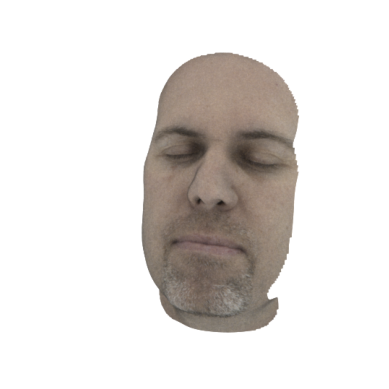

In [8]:
scene = mi.load_file("../scenes/polarized_face_env_map.xml")
image = mi.render(scene, spp=512)

plt.axis("off")
plt.imshow(image ** (1.0 / 2.2))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.08205273..1.6200578].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.6200291].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0013570826..1.620029].


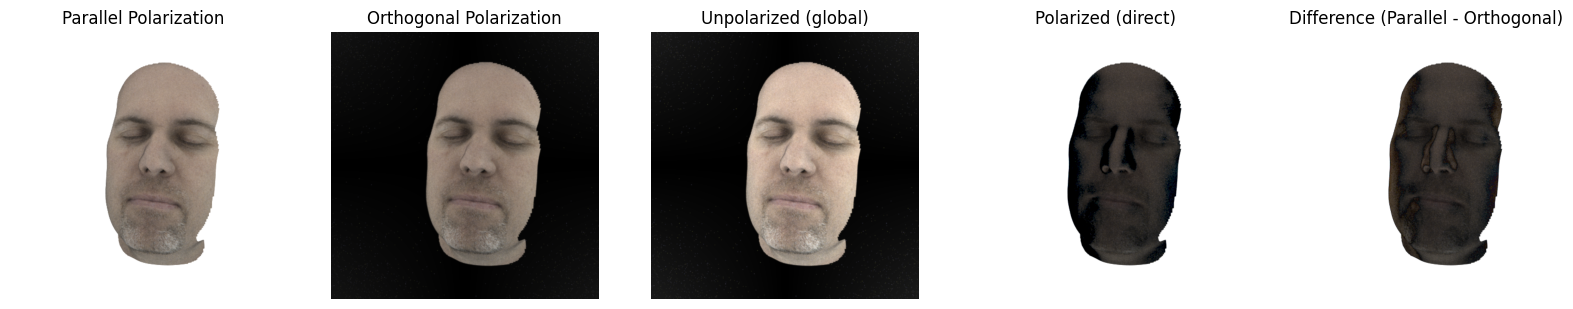

In [9]:
spp = 512
scene = mi.load_file("../scenes/polarized_face_env_map.xml")

parallel = mi.render(scene, spp=spp)

# Rotate camera polarizer by 90 deg
params = mi.traverse(scene)
params["polarizer_cam.bsdf.theta.value"] = 90
params.update()

orthogonal = mi.render(scene, spp=spp)

# Clip images to be >= 0
parallel[parallel < 0] = 0
orthogonal[orthogonal < 0] = 0

unpol = 2 * np.fmin(parallel, orthogonal)
pol = parallel - unpol / 2

diff = np.abs(parallel - orthogonal)

fig, ax = plt.subplots(1, 5, figsize=(20, 5))

ax[0].axis("off")
ax[0].imshow(parallel ** (1.0 / 2.2))
ax[0].set_title("Parallel Polarization")

ax[1].axis("off")
ax[1].imshow(orthogonal ** (1.0 / 2.2))
ax[1].set_title("Orthogonal Polarization")

ax[2].axis("off")
ax[2].imshow(unpol ** (1.0 / 2.2))
ax[2].set_title("Unpolarized (global)")

ax[3].axis("off")
ax[3].imshow(pol ** (1.0 / 2.2))
ax[3].set_title("Polarized (direct)")

ax[4].axis("off")
ax[4].imshow(diff ** (1.0 / 2.2))
ax[4].set_title("Difference (Parallel - Orthogonal)")

plt.show()

In [8]:
params = mi.traverse(scene)
print(params)

SceneParameters[
  -------------------------------------------------------------------------------------------------
  Name                                          Flags    Type              Parent
  -------------------------------------------------------------------------------------------------
  sensor.near_clip                                       float             PerspectiveCamera
  sensor.far_clip                                        float             PerspectiveCamera
  sensor.shutter_open                                    float             PerspectiveCamera
  sensor.shutter_open_time                               float             PerspectiveCamera
  sensor.film.size                                       ScalarVector2u    HDRFilm
  sensor.film.crop_size                                  ScalarVector2u    HDRFilm
  sensor.film.crop_offset                                ScalarPoint2u     HDRFilm
  sensor.x_fov                                  ∂, D     Float             Persp